# Problem Statement: Concrete Strength Prediction

## Objective:

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

## Resources Available: 

The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

## Attribute Information:

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.


### Steps and Tasks:

Exploratory Data Quality Report Reflecting the Following:  

Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails. (2 Marks)

Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. (4 Marks)

Using various plots, write the insights/observations about it. (6 Marks)

Bi-variate analysis between the predictor variables and also between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves and write the insights/business understanding of the same. (8 marks)

### Feature Engineering techniques

Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth. (3 Marks)

Get the data model ready and do a train test split.
Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)

### Creating the Model and Tuning It:

Algorithms that you think will be suitable for this project.
Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there and try to achieve 90% accuracy on testing set). (7 Marks)

Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (8 Marks)

Write the significance of the R2 score from the business perspective. Explain the effect of an increase/decrease in the R2 score on the business model. (4 Marks)

Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis. Also, write the reason for your recommendation. (8 Marks)

The marks for the score will be according to the following: testing score 90 -95 (5 marks), 85 - 90 (4 marks), 80 - 85( 3 marks), <80 (2 marks)

 

Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
cdata = pd.read_csv('concrete.csv')

In [3]:
cdata.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Expolratory Data Analysis

In [4]:
#identifying datatypes and null values
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
print(f"The given dataset contains {cdata.shape[0]} rows and {cdata.shape[1]} columns")
print(f"The given dataset contains {cdata.isna().sum().sum()} Null value")

The given dataset contains 1030 rows and 9 columns
The given dataset contains 0 Null value


In [6]:
cdata.duplicated().sum()     # We can see that, now the duplicate rows are zero.
print(f"The given dataset have =  {cdata.duplicated().sum()}  duplicate rows ")

The given dataset have =  25  duplicate rows 


In [7]:
# Drop the duplicates.
cdata.drop_duplicates(inplace=True)

In [8]:
print(f"The given dataset have =  {cdata.duplicated().sum()}  duplicate rows after Removing ")

The given dataset have =  0  duplicate rows after Removing 


In [9]:
#Descriptive statistics of each column
cdata.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


## Observations
#All of the data in the dataset is numerical ( either Float or int)
#No null/NAN data

In [10]:
cdata.shape

(1005, 9)

In [11]:
#Outlier Detection

for i in cdata.columns:
    q1 = cdata[i].quantile(.25)
    q3 = cdata[i].quantile(.75)
    IQR = q3-q1
    IQR=IQR*1.5
    lowerlimit = q1-IQR
    upperlimit = q3+IQR
    a=cdata[(cdata[i]<lowerlimit)|(cdata[i]>upperlimit)]
    percentage = round((a.shape[0]/cdata.shape[0])*100,2)
    print(i,"has",a.shape[0],"outliers", "which translate to",(percentage),"% of the total value, and IQR:", IQR)

cement has 0 outliers which translate to 0.0 % of the total value, and IQR: 237.45000000000002
slag has 2 outliers which translate to 0.2 % of the total value, and IQR: 213.75
ash has 0 outliers which translate to 0.0 % of the total value, and IQR: 177.45
water has 15 outliers which translate to 1.49 % of the total value, and IQR: 39.45000000000002
superplastic has 10 outliers which translate to 1.0 % of the total value, and IQR: 15.0
coarseagg has 0 outliers which translate to 0.0 % of the total value, and IQR: 148.5
fineagg has 5 outliers which translate to 0.5 % of the total value, and IQR: 146.85000000000014
age has 59 outliers which translate to 5.87 % of the total value, and IQR: 73.5
strength has 8 outliers which translate to 0.8 % of the total value, and IQR: 32.025


# Other Way to clean up the Outliers Using super Class

# My Outlier Class to handle outliers (To Replace the mean value)

In [12]:
from sklearn.impute import SimpleImputer

class OutliersImputer(SimpleImputer):
    '''
    This class extends the functionality of SimpleImputer to handle outliers.
    '''
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        super().__init__(strategy=strategy)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])
        return super().fit(X, y)

# Observations
## Age data appears to have 59 outliers because max value is very large as compared to 3rd IQR value

In [13]:
# Check the skewness of the data.
cdata.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

In [14]:
def col_out(i):
    q1 = cdata[i].quantile(.25)
    q3 = cdata[i].quantile(.75)
    IQR = q3-q1
    IQR=IQR*1.5
    lowerlimit = q1-IQR
    upperlimit = q3+IQR
    a=cdata[(cdata[i]<lowerlimit)|(cdata[i]>upperlimit)]
    print("Total number of outliers in", i , "is", a[i].shape[0])
    return(i)

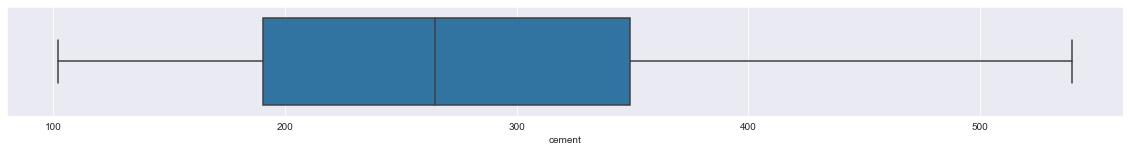

Total number of outliers in cement is 0


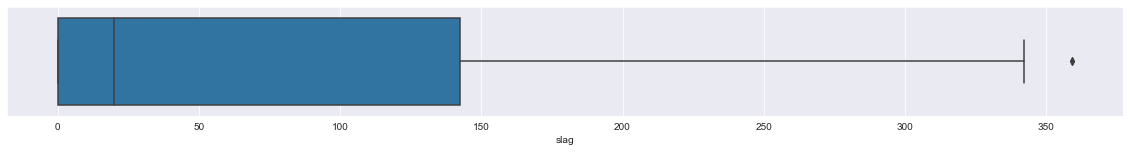

Total number of outliers in slag is 2


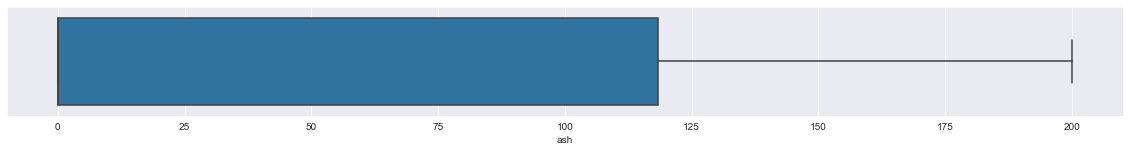

Total number of outliers in ash is 0


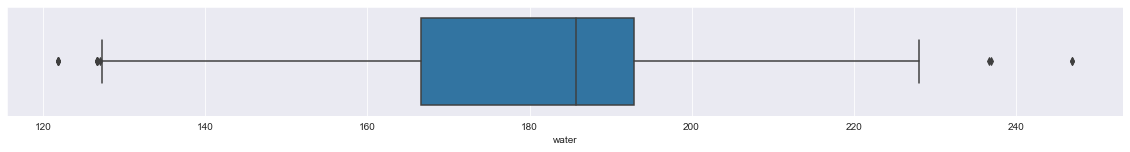

Total number of outliers in water is 15


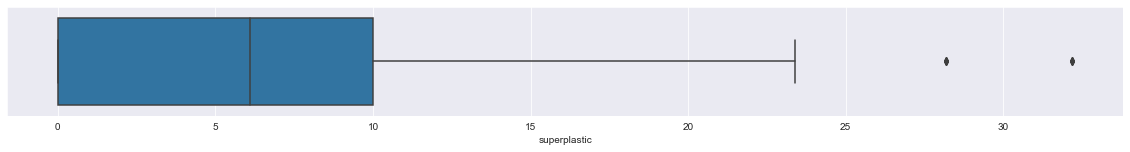

Total number of outliers in superplastic is 10


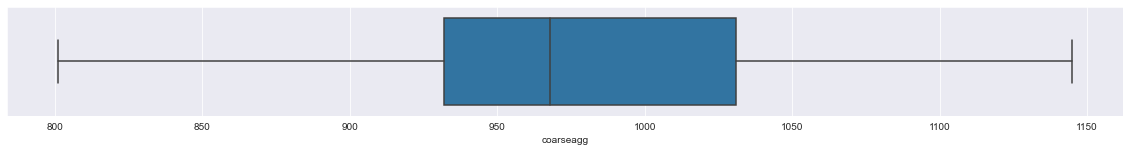

Total number of outliers in coarseagg is 0


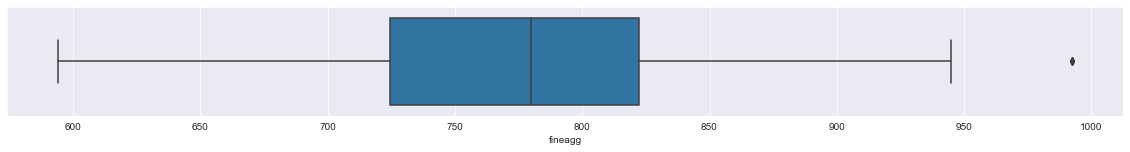

Total number of outliers in fineagg is 5


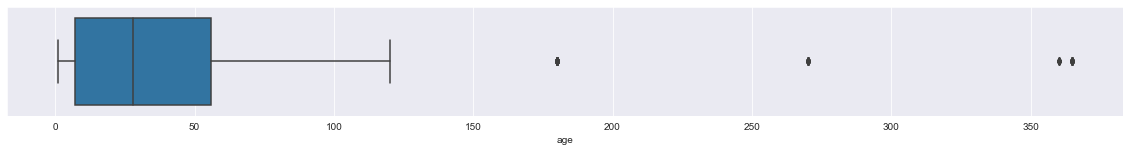

Total number of outliers in age is 59


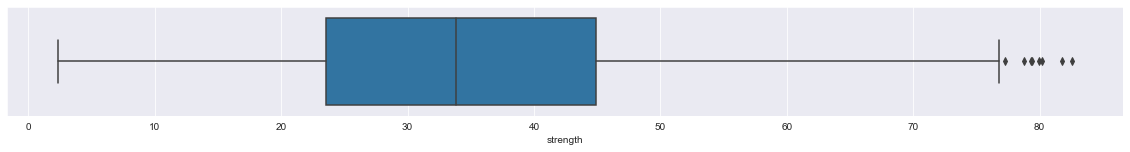

Total number of outliers in strength is 8


In [15]:
for i in cdata.columns:
    fig,ax = plt.subplots(figsize=(20, 2))
    sns.boxplot(cdata[i])
    plt.show()
    col_out(i)


# Left skewer ( Age,superPlastic ,water, Slag)
# Strengeth, fineAgg, water and cement is normally distributed
# cement and slag or strong correlation
# cement, coarseagg  and ash have Zero Outliers

### Comments on 0 values in the dataset

## Analysis based on different plots

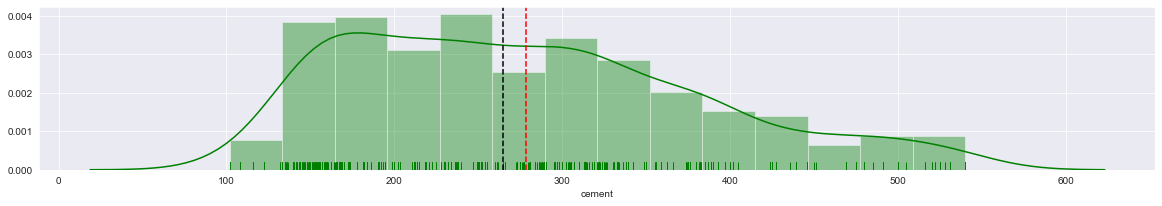

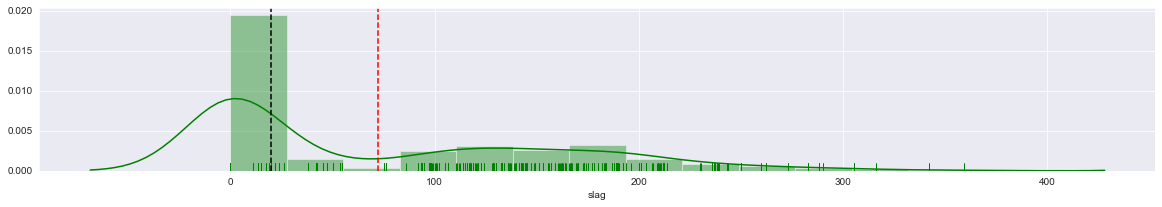

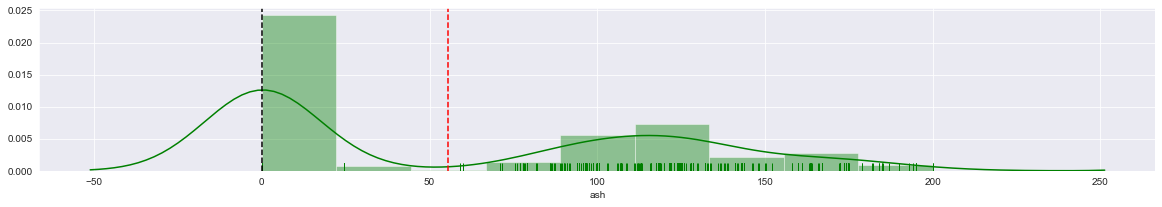

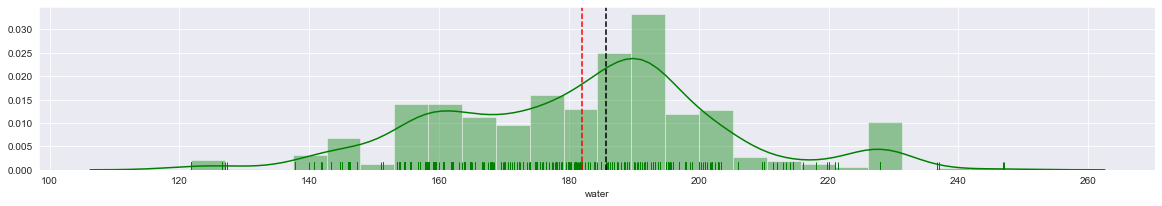

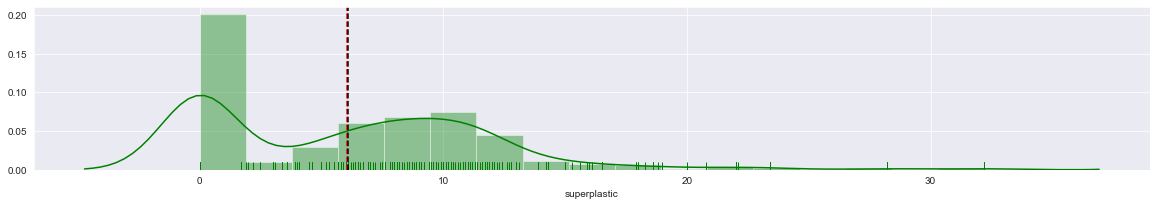

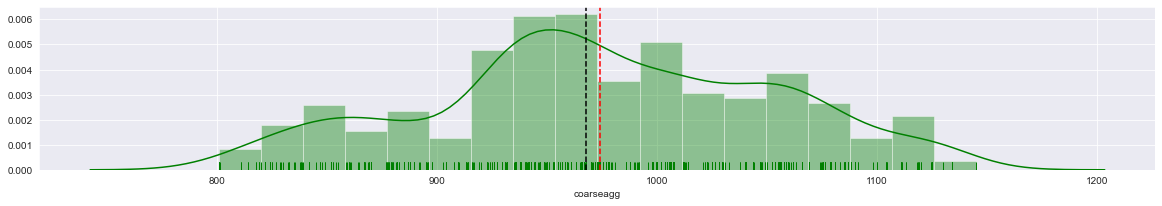

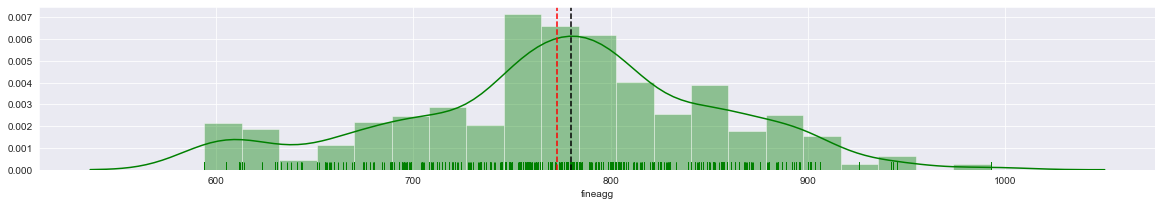

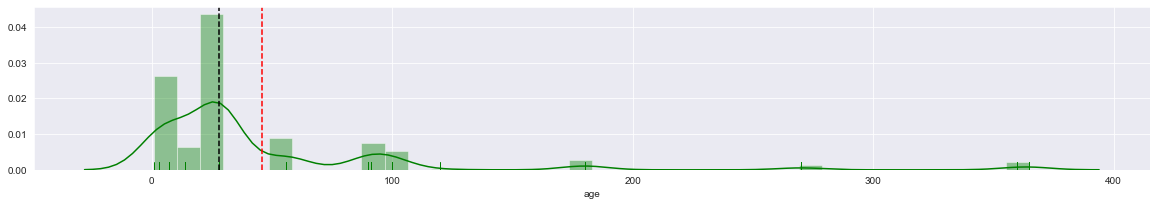

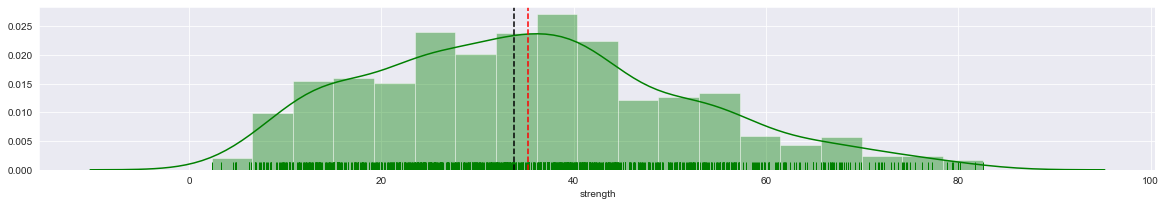

In [16]:
# Distplot across all the variables in the data set
for i in cdata.columns:
    fig,ax = plt.subplots(figsize=(20, 3))
    sns.distplot(cdata[i],color='green', rug=True)
    ## mean line for each data column
    plt.axvline(cdata[i].mean(),linestyle="dashed",label="mean", color='red')
    plt.axvline(cdata[i].median(),linestyle="dashed",label="mean", color='black')
    plt.show()

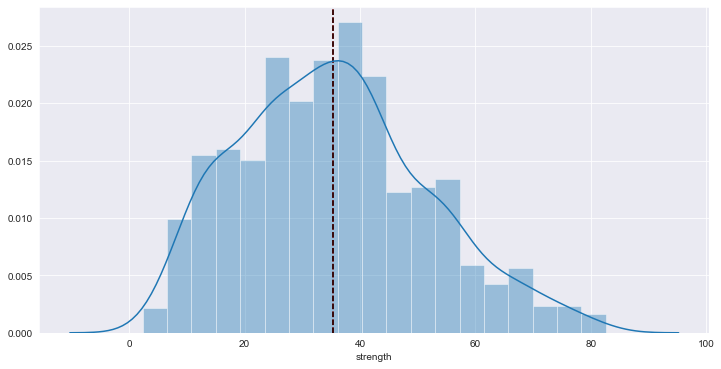

In [17]:
## just trying specific plot
fig = plt.figure(figsize=(12, 6))
plt.axvline(cdata.strength.mean(),linestyle="dashed",label="mean", color='red')
plt.axvline(cdata.strength.mean(),linestyle="dashed",label="median", color='black')
sns.distplot(cdata.strength);

## Bivariate Analysis

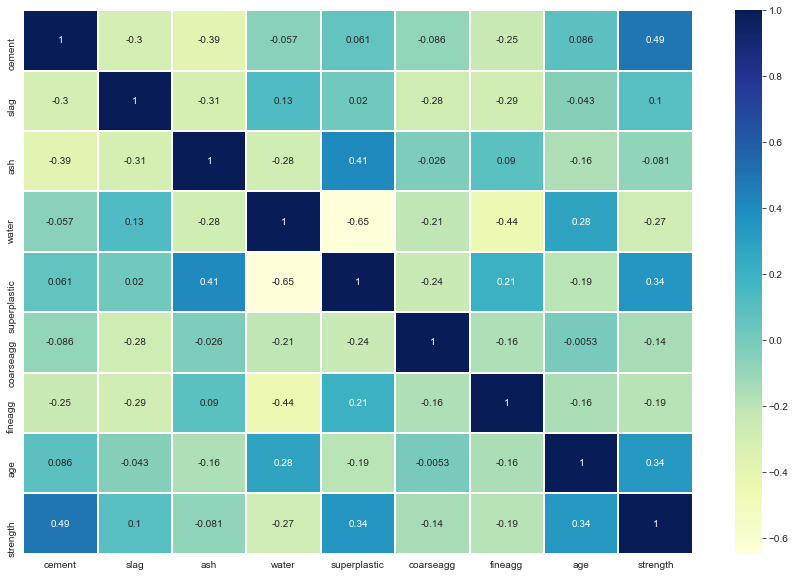

In [18]:
fig,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cdata.corr(), cmap='YlGnBu', annot=True,linewidths=1.0)

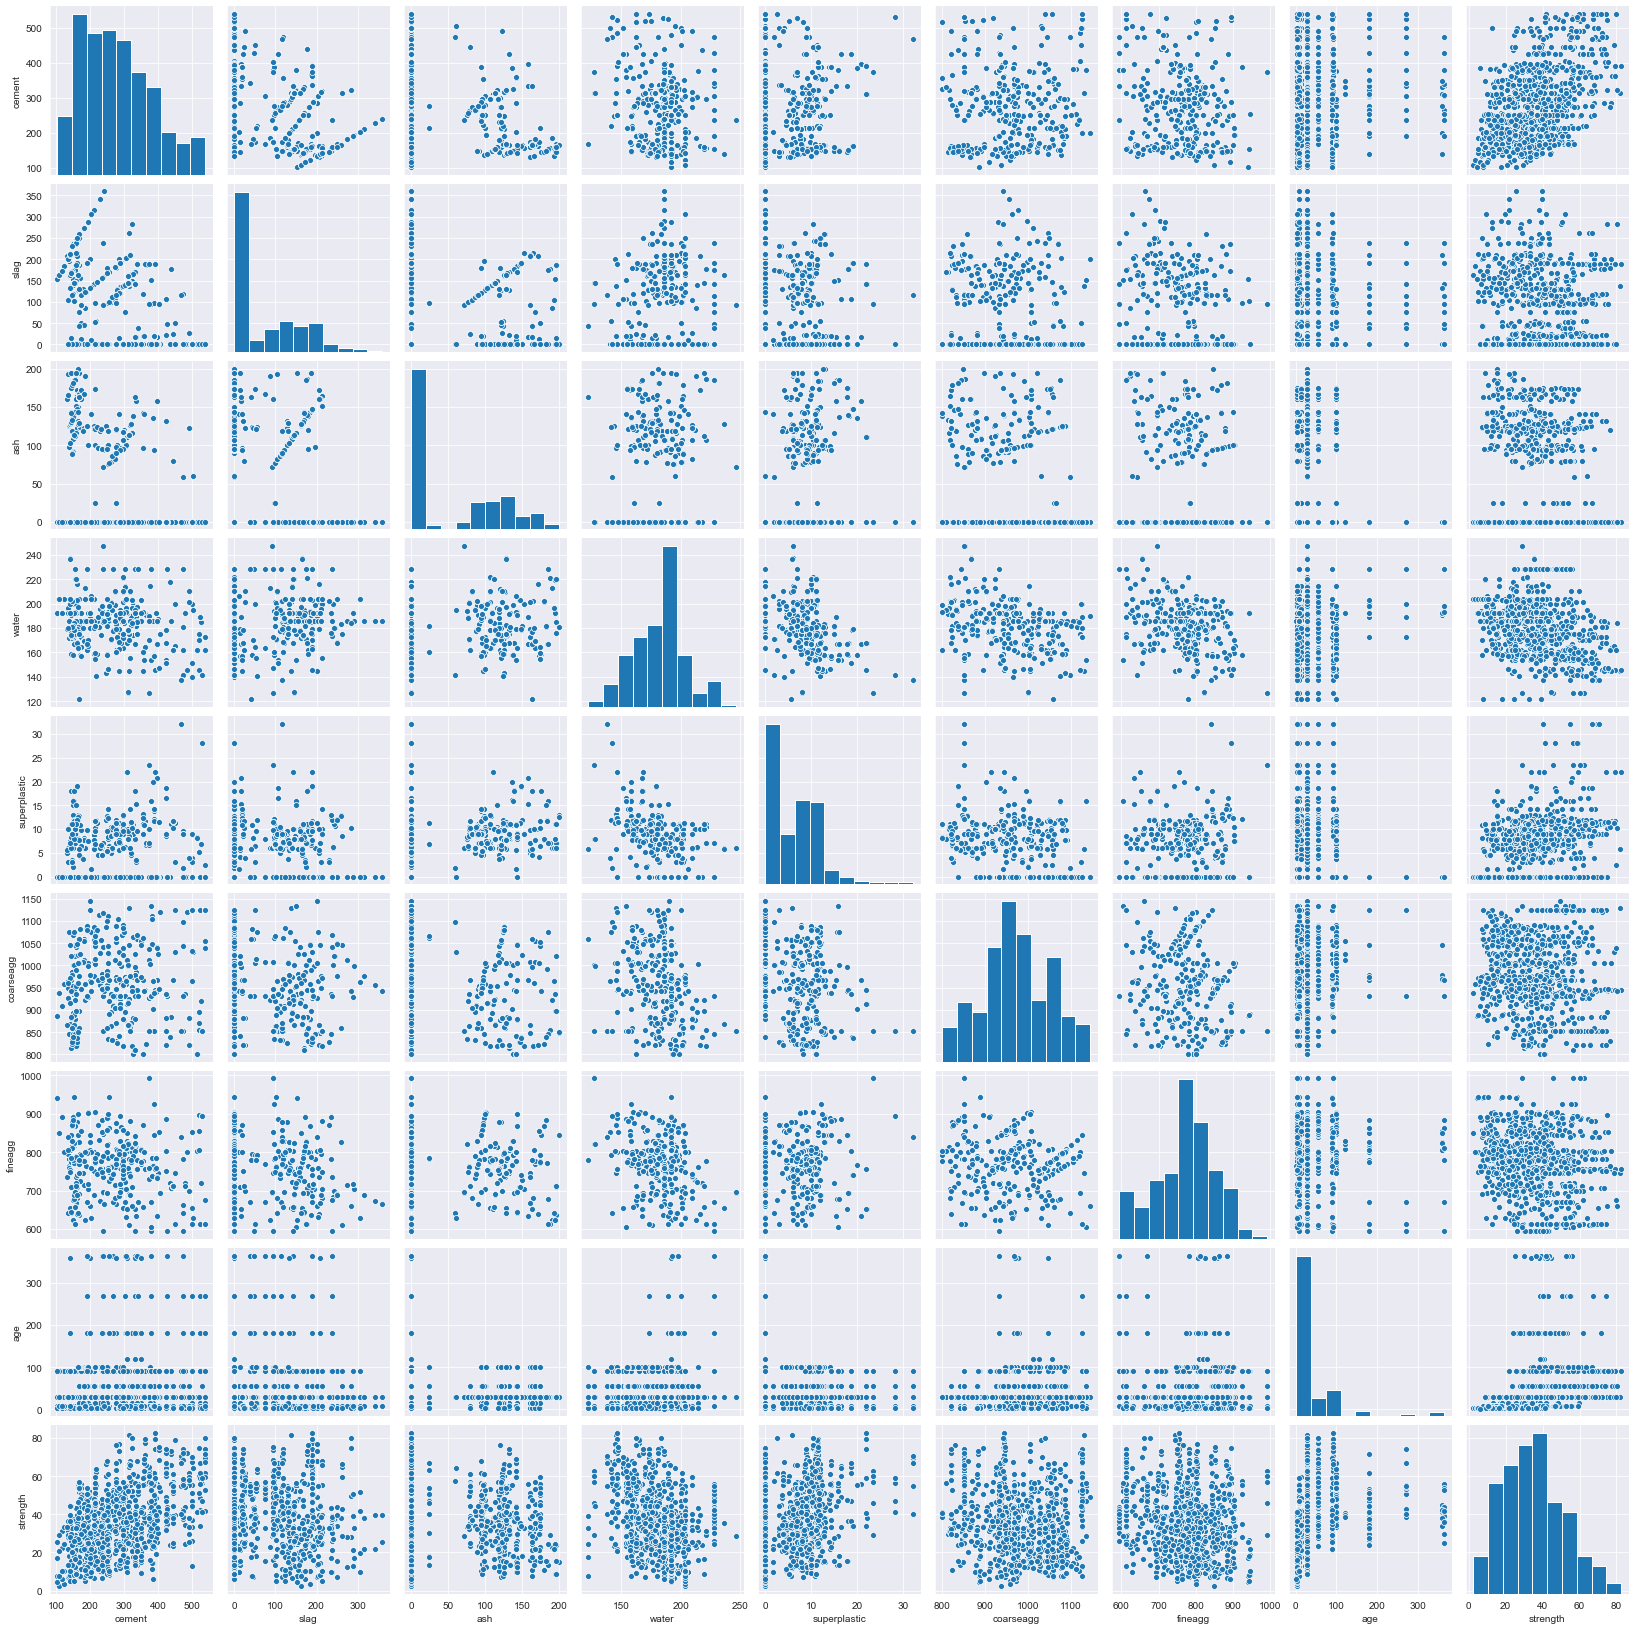

In [19]:
sns.pairplot(cdata)

## Feature Engineering techniques

Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth. (3 Marks)

Get the data model ready and do a train test split. Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)

## After analysis  dropping any column value , extract new features from existing features not necessary, outlier treatment not required for now ( may be it give + or - 2 % confidence )

In [20]:
cdata.head(20)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [21]:
cdata.groupby("strength").mean()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
strength,,,,,,,,
2.33,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3.0
3.32,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3.0
4.57,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3.0
4.78,153.0,102.0,0.0,192.0,0.0,888.0,943.1,3.0
4.83,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3.0
...,...,...,...,...,...,...,...,...
79.40,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56.0
79.99,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
80.20,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56.0


In [22]:
# trying to replace the mean value insted of 0.0 , see whether it
#cdata['ash']=cdata['ash'].replace(0.0, cdata['ash'].median())
#cdata['ash']=cdata['ash'].mask(cdata['ash'] == 0 ).fillna(cdata['ash'].mean())

In [23]:
cdata.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


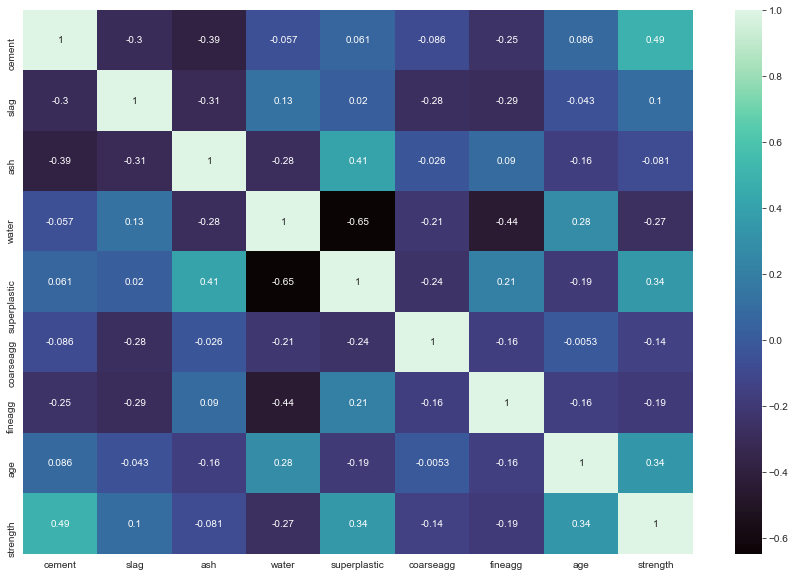

In [24]:
fig,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cdata.corr(), annot=True, cmap = 'mako')

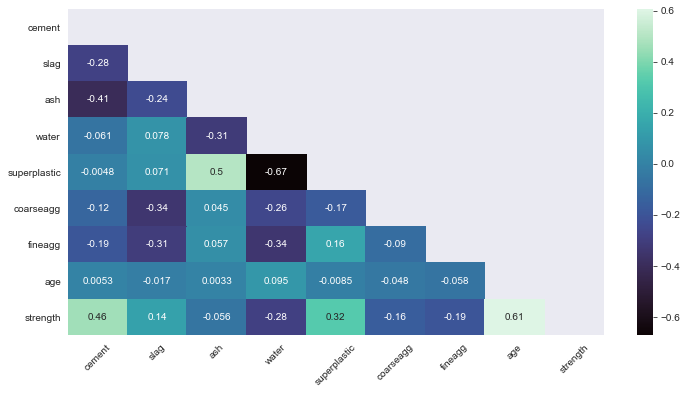

In [25]:
## finding correlation - Do Not use this ...
plt.subplots(figsize=(12, 6))
corr = cdata.corr('spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

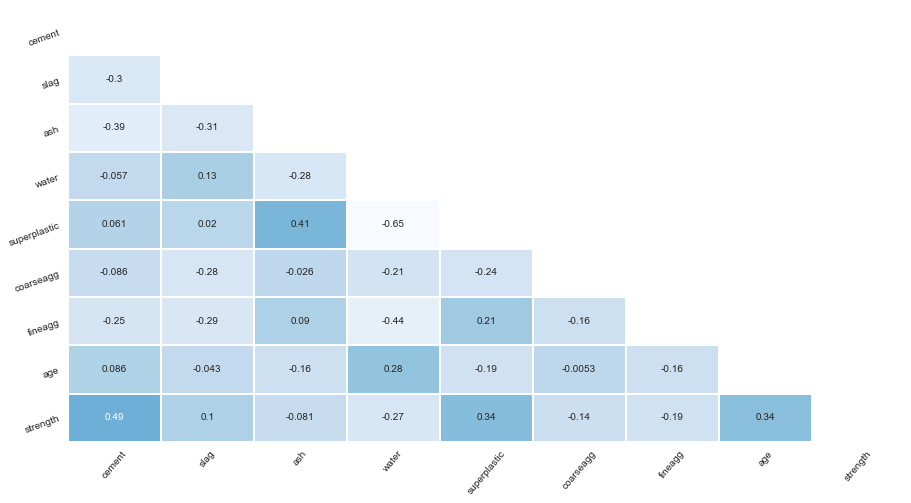

In [26]:
corr = cdata.corr()                   # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0              # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))            # setting the figure size
sns.set_style(style = 'white')          # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)               # Aesthetic purposes
plt.yticks(rotation = 20)               # Aesthetic purposes
plt.show()

# correlation
### Age and Cement has upper hand in correlation
### Correlation Rank Order ( #1 Cement , #2 Age , #3 SuperPlastic, #4 slag )

# Helper Class to iterate multiple models  (70:30 hardcoded)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np

class Regressor(object):
    """
    Class representing a regressor.
    Based on the parameters supplied in the constructor, this class constructs a pipeline object.
    The constructed pipeline adds 
    - Standard scalar if the scale parameter is passed as True
    - Polynomial Feature transformations if the include_polymomial flag is set as True
    """
    def __init__(self, name, model, scale=True, include_polynomial=False, degree=2):
        self.name = name
        self.model = model
        steps = []
        if scale:
            steps.append(('scaler', StandardScaler()))
        if include_polynomial:
            steps.append(('poly_features', PolynomialFeatures(degree=degree)))
        steps.append(('model', model))
        self.steps = steps

    def get_name(self):
        return self.name

    def get_model(self):
        return self.model

    def get(self):
        return Pipeline(steps=self.steps)

    def feature_imp(self):
        try:
            return self.model.feature_importances_
        except AttributeError:
            try:
                return self.model.coef_
            except AttributeError:
                return None


class ModelsBuilder(object):
    '''
    This class is responsible for building the model and constructing a results dataframe.
    It accepts several regressor objects.
    '''
    # test_size=0.2 or test_size=0.3
    
    def __init__(self, regressors, data, target, test_size=0.3, seed=42):
        self.regressors = regressors
        self.split_data = train_test_split(data.drop(target, axis=1), data[target], test_size=test_size, random_state=seed)
        self.data = data
        self.target = target

    def build(self, k_fold_splits=10):
        results = pd.DataFrame(columns=['model', 'training_score', 'test_score', 'k_fold_mean', 'k_fold_std'])
        for regressor in self.regressors:
            regressor.get().fit(self.split_data[0], self.split_data[2])
            cross_vals = cross_val_score(regressor.get(), self.data.drop(self.target, axis=1), self.data[self.target], cv=KFold(n_splits=k_fold_splits))
            mean = round(cross_vals.mean(), 3)
            std = round(cross_vals.std(), 3)
            results = results.append({
                'model': regressor.get_name(),
                'training_score': round(regressor.get().score(self.split_data[0], self.split_data[2]), 3),
                'test_score': round(regressor.get().score(self.split_data[1], self.split_data[3]),3), 
                'k_fold_mean': mean, 
                'k_fold_std': std, 
                'Confidence intervals : 95% ': str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))
                }, ignore_index=True)

        return results

In [28]:
x=cdata.drop(['strength'],1)
y=cdata['strength']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=1)

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
LR = LinearRegression()
LaR=Lasso()
RR=Ridge()
LR.fit(x_train, y_train)
y_predict = LR.predict(x_test)
LaR.fit(x_train, y_train)
y_predict = LaR.predict(x_test)
RR.fit(x_train, y_train)
y_predict = RR.predict(x_test)

# Linear Regression - Primitive way of getting score

In [31]:
#simple linear model 

LR_test_score = LR.score(x_test, y_test)
LR_train_score = LR.score(x_train, y_train)
LaR_test_score = LaR.score(x_test, y_test)
LaR_train_score = LaR.score(x_train, y_train)
RR_test_score = RR.score(x_test, y_test)
RR_train_score = RR.score(x_train, y_train)
print('-----------Simple Linear Regression Test Score---------')
print('Linear Regression Test Score:',LR_test_score)
print('Linear Regression Train Score:',LR_train_score)
print('Lasso Regression Test Score:',LaR_test_score)
print('Lasso Regression Train Score:',LaR_train_score)
print('Ridge Regression Test Score:',RR_test_score)
print('Ridge Regression Train Score:',RR_train_score)

-----------Simple Linear Regression Test Score---------
Linear Regression Test Score: 0.5419610271323057
Linear Regression Train Score: 0.6217217238825694
Lasso Regression Test Score: 0.543366201629973
Lasso Regression Train Score: 0.6215112184839364
Ridge Regression Test Score: 0.5419615403118874
Ridge Regression Train Score: 0.6217217238340094


In [35]:
from sklearn.preprocessing import PolynomialFeatures
X = [[1, 2],
     [3, 4],
     [5, 6]]
poly = PolynomialFeatures(interaction_only=True) 
poly.fit_transform(X)

array([[ 1.,  1.,  2.,  2.],
       [ 1.,  3.,  4., 12.],
       [ 1.,  5.,  6., 30.]])

In [36]:
#Degree 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly',PolynomialFeatures(interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(x_train, y_train)

print(pipeline.score(x_train, y_train))
print(pipeline.score(x_test, y_test))

NameError: name 'DecisionTreeRegressor' is not defined

# Using Class iterate multiple model

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

regressors = [
    Regressor('Linear Regression', LinearRegression(), scale=True),
    Regressor('Linear Regression Quadratic  Degree 2', LinearRegression(),scale=True, include_polynomial=True, degree=2),
    Regressor('Linear Regression Cubic Degree 3', LinearRegression(),scale=True, include_polynomial=True, degree=3),
    Regressor('Ridge', Ridge(random_state=42), scale=True),
    Regressor('Ridge Quadratic Degree2 ', Ridge(random_state=42), scale=True, include_polynomial=True, degree=2),
    Regressor('Ridge Cubic Degree3 ', Ridge(random_state=42), scale=True, include_polynomial=True, degree=3),
    Regressor('Lasso', Lasso(random_state=42), scale=True),
    Regressor('Lasso Quadratic Degree 2', Lasso(random_state=42), scale=True, include_polynomial=True, degree=2),
    Regressor('Lasso Cubic Degree 3', Lasso(random_state=42), scale=True, include_polynomial=True, degree=3),
    Regressor('Decision Tree', DecisionTreeRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Ada Boosting', AdaBoostRegressor(random_state=42), scale=True),
    Regressor('Random Forest', RandomForestRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Gradient Boosting', GradientBoostingRegressor(random_state=42, max_depth=5), scale=True),
    Regressor('KNN', KNeighborsRegressor(n_neighbors=3), scale=True),
    Regressor('SVR', SVR(gamma='auto'), scale=True),
]

# Iteration 1 - Use all data

In [38]:
result = ModelsBuilder(regressors, cdata, 'strength').build()
result

,model,training_score,test_score,k_fold_mean,k_fold_std,Confidence intervals : 95%
0,Linear Regression,0.625,0.545,0.577,0.082,0.416 <-> 0.738
1,Linear Regression Quadratic Degree 2,0.818,0.748,0.767,0.051,0.667 <-> 0.867
2,Linear Regression Cubic Degree 3,0.934,0.845,0.848,0.043,0.764 <-> 0.932
3,Ridge,0.625,0.546,0.577,0.082,0.416 <-> 0.738
4,Ridge Quadratic Degree2,0.816,0.752,0.767,0.052,0.665 <-> 0.869
5,Ridge Cubic Degree3,0.928,0.858,0.860,0.038,0.786 <-> 0.934
6,Lasso,0.572,0.521,0.530,0.064,0.405 <-> 0.655
7,Lasso Quadratic Degree 2,0.711,0.665,0.672,0.048,0.578 <-> 0.766
8,Lasso Cubic Degree 3,0.721,0.657,0.672,0.046,0.582 <-> 0.762
9,Decision Tree,0.721,0.654,0.632,0.029,0.575 <-> 0.689


# Observation
## simple Linear model doesent give good confident.
## Gradiant boosting is the best model which give over 97% confident
## training_score	& test_score are proper Fit
## No Big changes by changing 70-30 to 80-20 data split

# ----------------------------------------------------------------------------------
# Iteration 2 - Treat outlier

# Trying create a model after outlier treatment ( Replacing mean value)
### superplastic is (10)

In [39]:
#using Outliers In(61) super class 
cdata[['superplastic']] = OutliersImputer().fit_transform(cdata[['superplastic']])

In [40]:
result_of_outliers_treatment = ModelsBuilder(regressors, cdata, 'strength').build()
result_of_outliers_treatment

,model,training_score,test_score,k_fold_mean,k_fold_std,Confidence intervals : 95%
0,Linear Regression,0.631,0.550,0.581,0.085,0.414 <-> 0.748
1,Linear Regression Quadratic Degree 2,0.818,0.751,0.771,0.046,0.681 <-> 0.861
2,Linear Regression Cubic Degree 3,0.933,0.851,0.850,0.033,0.785 <-> 0.915
3,Ridge,0.631,0.551,0.581,0.085,0.414 <-> 0.748
4,Ridge Quadratic Degree2,0.817,0.754,0.771,0.047,0.679 <-> 0.863
5,Ridge Cubic Degree3,0.927,0.858,0.859,0.029,0.802 <-> 0.916
6,Lasso,0.581,0.531,0.541,0.068,0.408 <-> 0.674
7,Lasso Quadratic Degree 2,0.712,0.666,0.674,0.050,0.576 <-> 0.772
8,Lasso Cubic Degree 3,0.719,0.657,0.670,0.047,0.578 <-> 0.762
9,Decision Tree,0.721,0.654,0.634,0.033,0.569 <-> 0.699


# Observation Iteration 2 , After Treating data 'superplastic'  
## simple Linear model doesent give good confident.
## Gradiant boosting is the best model which give over 97% confident after treating  outlier

# ----------------------------------------------------------------------------------
# Parameter Tuning
# Iteration 3 -  drop the column (ash, coarseagg) which has a less correlation with strengeth

In [41]:
result_feature_drop = ModelsBuilder(regressors, cdata.drop(['ash', 'coarseagg'], axis=1), 'strength').build()
result_feature_drop

,model,training_score,test_score,k_fold_mean,k_fold_std,Confidence intervals : 95%
0,Linear Regression,0.606,0.548,0.564,0.093,0.382 <-> 0.746
1,Linear Regression Quadratic Degree 2,0.787,0.757,0.754,0.054,0.648 <-> 0.86
2,Linear Regression Cubic Degree 3,0.888,0.853,0.841,0.038,0.767 <-> 0.915
3,Ridge,0.606,0.548,0.564,0.092,0.384 <-> 0.744
4,Ridge Quadratic Degree2,0.787,0.756,0.754,0.054,0.648 <-> 0.86
5,Ridge Cubic Degree3,0.887,0.852,0.842,0.038,0.768 <-> 0.916
6,Lasso,0.581,0.531,0.541,0.068,0.408 <-> 0.674
7,Lasso Quadratic Degree 2,0.711,0.667,0.676,0.048,0.582 <-> 0.77
8,Lasso Cubic Degree 3,0.712,0.672,0.676,0.050,0.578 <-> 0.774
9,Decision Tree,0.721,0.654,0.637,0.031,0.576 <-> 0.698


# Fracation of improvment after dropping column , but not the best :(

# model Tuning using Randomized search (80:20) using GradientBoostingRegressor

In [42]:
# Split data 80:20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cdata.drop(['ash','strength'], axis=1), cdata['strength'], test_size = 0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((804, 7), (201, 7), (804,), (201,))

## Prepare parameter grid

In [43]:
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [2, 3, 4, 5],
    'max_features': ['sqrt', None],
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

### Perform hyper parameter tuning using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, return_train_score= True, n_jobs=-1, verbose=2, cv = 10, n_iter=500)
rs.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min


In [ ]:
mean = rs.best_score_
std = rs.cv_results_['mean_test_score'].std()
print(f"Mean training score: {rs.cv_results_['mean_train_score'].mean()}")
print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {rs.best_params_}")
print(f"Test score: {rs.score(X_test, y_test)}")

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
parameters = {'alpha':[1, 10]}
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)
Ridge_reg.fit(X_train, y_train)

In [ ]:
print(Ridge_reg.best_score_)
std = Ridge_reg.cv_results_['mean_test_score'].std()
print("Mean training score: ", std)


In [ ]:
best_model = Ridge_reg.best_estimator_
best_model.fit(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt

alphas = [1, 10]
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Conclusion
###  Mean training score vs Test score diff (0.001), felt like fit.
### in order to predict the strength of concrete, The features that affect the strength are cement, slag, water, superplastic and age
### The best model is Gradient boosting 
### strongly recommend using Gradient boosting model, we can predict the strength accurately between 83% to 100% with 95% confidence.